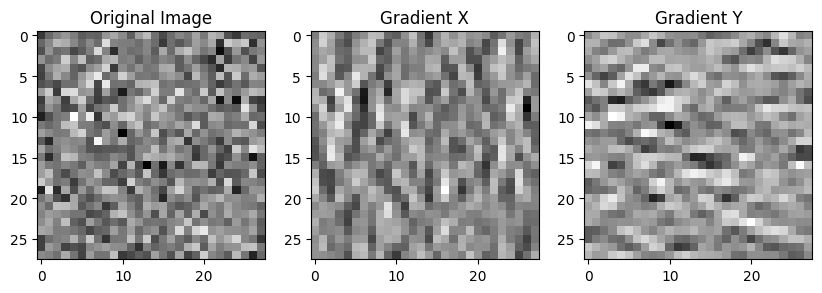

In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

# Load image (assuming grayscale for simplicity)
image = torch.randn(1, 1, 28, 28)  # Example image with shape (batch_size, channels, height, width)

# Convert image to PyTorch Variable
image_var = Variable(image, requires_grad=True)

# Compute gradients using Sobel operator
gradient_x = F.conv2d(image_var, torch.FloatTensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).view(1, 1, 3, 3), padding=1)
gradient_y = F.conv2d(image_var, torch.FloatTensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).view(1, 1, 3, 3), padding=1)

# Magnitude of gradients
magnitude = torch.sqrt(gradient_x.pow(2) + gradient_y.pow(2))

# Plot original image and gradients
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gradient_x.squeeze().detach().numpy(), cmap='gray')
plt.title('Gradient X')

plt.subplot(1, 3, 3)
plt.imshow(gradient_y.squeeze().detach().numpy(), cmap='gray')
plt.title('Gradient Y')

plt.show()


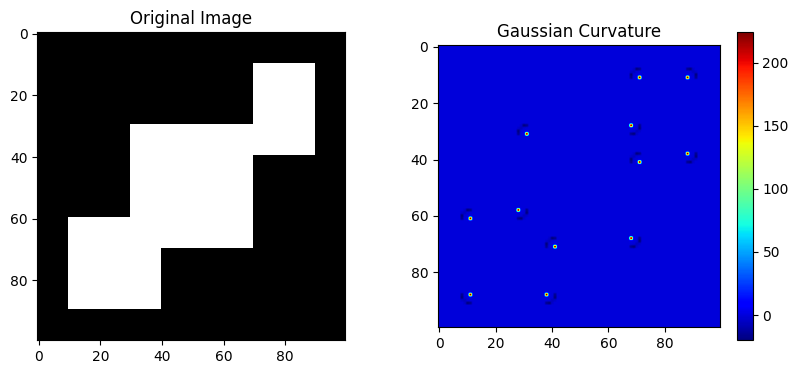

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Function to compute Gaussian curvature from image gradients
def compute_gaussian_curvature(image):
    # Compute gradients
    grad_x = F.conv2d(image, torch.FloatTensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).view(1, 1, 3, 3), padding=1)
    grad_y = F.conv2d(image, torch.FloatTensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).view(1, 1, 3, 3), padding=1)
    
    # Compute second-order derivatives
    grad_xx = F.conv2d(grad_x, torch.FloatTensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).view(1, 1, 3, 3), padding=1)
    grad_yy = F.conv2d(grad_y, torch.FloatTensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).view(1, 1, 3, 3), padding=1)
    grad_xy = F.conv2d(grad_x, torch.FloatTensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).view(1, 1, 3, 3), padding=1)
    
    # Compute Gaussian curvature
    curvature = (grad_xx * grad_yy - grad_xy.pow(2)) / (1 + grad_x.pow(2) + grad_y.pow(2)).pow(2)
    
    return curvature

# Generate a sample binary image of shapes
image = torch.zeros(1, 1, 100, 100)  # Assuming grayscale image of size 100x100
image[:, :, 30:70, 30:70] = 1  # Square shape
image[:, :, 10:40, 70:90] = 1  # Rectangle shape
image[:, :, 60:90, 10:40] = 1  # Rectangle shape

# Compute Gaussian curvature
curvature = compute_gaussian_curvature(image)

# Visualize original image and curvature map
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(curvature.squeeze().detach().numpy(), cmap='jet')
plt.colorbar()
plt.title('Gaussian Curvature')

plt.show()


In [33]:
image_path = "./data/train/church/images/00001.png"